# Setting up
#### Importing libraries for the entire file

In [1]:
import numpy as  np
import scipy.optimize as opt
import matplotlib.pyplot as plt

#### Declaring functions for the entire file

In [2]:
def linear(x, a, b=0):
    """
    Returns the image of the data x under the linear function with parametres a and b.

    Parametres 
    ----------
    x : float or ndarray
        Input data

    a : float
        First parameter of the function (slope)

    b : Second parameter of the function (y-intercept)
        

    Returns
    -------
    y : float or ndarray
        Value or ndarray of the values of a*x+b
    """
    
    return a*x+b 

#### Declaring variables for the entire file

In [3]:
# Taking a linear function as our model 
model = linear

# Arbitrarily choosing 3 and 7 as the parameters of the model
a = 3
b = 7

# First steps

#### Displaying a scatter plot with `matplotlib.pyplot.scatter()`

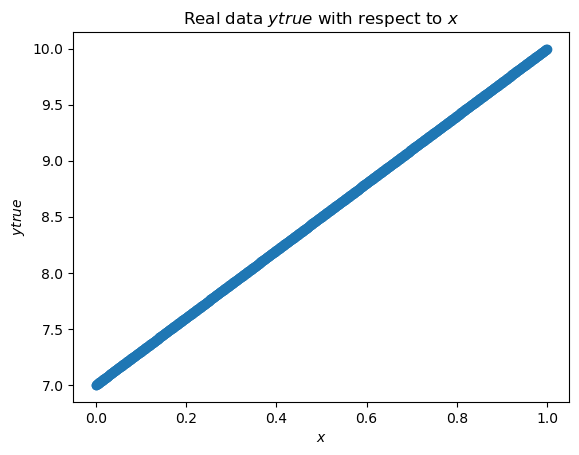

In [4]:
# Generating a set of x data (numerical values arbitrarily chosen)
x = np.arange(0, 1, 0.001)

# Computing the y data
ytrue = model(x, a, b)

# Creating a figure
fig, ax = plt.subplots()

# Scattering data
ax.scatter(x, ytrue)

# Setting figure and axes titles
plt.title("Real data $ytrue$ with respect to $x$")
plt.xlabel("$x$")
plt.ylabel("$ytrue$")

# Displaying the figure
plt.show()

#### Displaying a line chart with `matplotlib.pyplot.plot()`

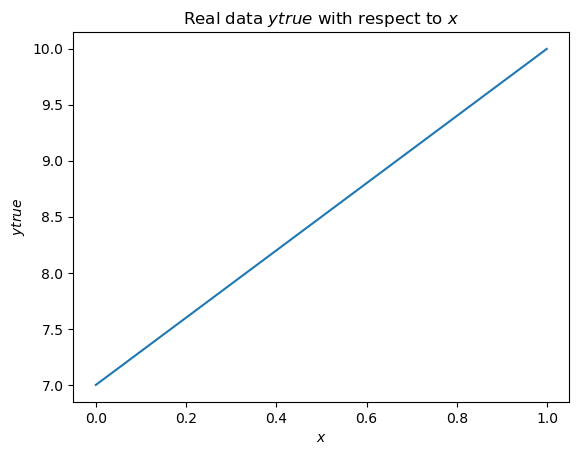

In [5]:
# Generating a set of x data
x = np.arange(0, 1, 0.001)

# Computing the y data
ytrue = model(x, a, b)

# Generating and displaying the plot
fig, ax = plt.subplots()

ax.plot(x, ytrue)

plt.title("Real data $ytrue$ with respect to $x$")
plt.xlabel("$x$")
plt.ylabel("$ytrue$")

plt.show()

#### Hadamard product with numpy

In [6]:
m1 = np.array([[1,2],[3,4]])
m2 = np.array([[5,6],[7,8]])

print(f"Test 1: {np.multiply(a,b)}")
print(f"Test 2: {a*b}")

Test 1: 21
Test 2: 21


#### Adding noise to y

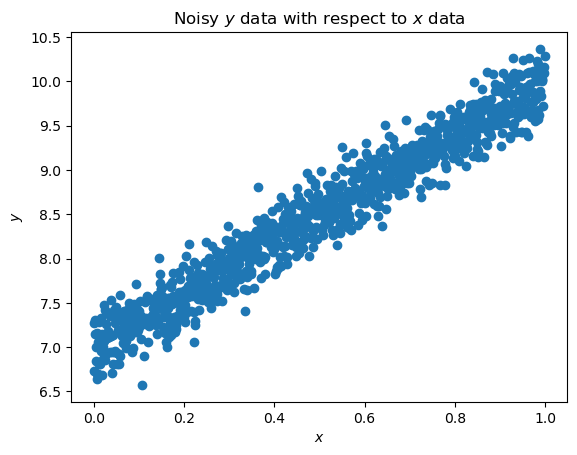

In [7]:
# Generating a set of x data
x = np.arange(0, 1, 0.001)

# Computing the y data
ytrue = model(x, a, b)

# Adding noise to y data
e = np.random.normal(loc=0, scale=0.2, size=len(x))
y = ytrue + e

# Displaying the result as a plot
fig, ax = plt.subplots()

ax.scatter(x, y)

plt.title("Noisy $y$ data with respect to $x$ data")
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.show()

#### A lot of noise to y...

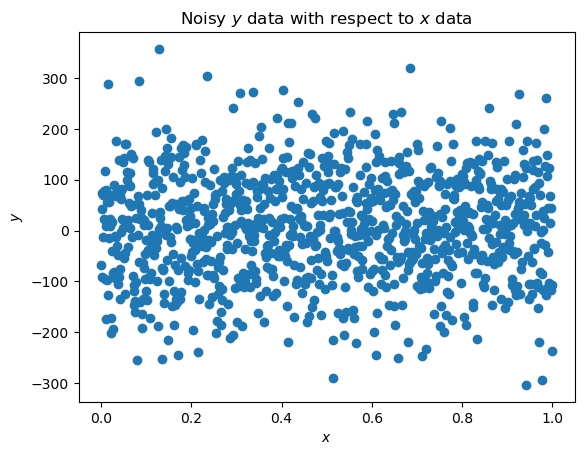

In [8]:
# Generating a set of x data
x = np.arange(0, 1, 0.001)

# Computing the y data
ytrue = model(x, a, b)

# Adding noise to y data
e = np.random.normal(loc=0, scale=100, size=len(x))
y = ytrue + e

# Displaying the result as a plot
fig, ax = plt.subplots()

ax.scatter(x, y)

plt.title("Noisy $y$ data with respect to $x$ data")
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.show()

#### More data...

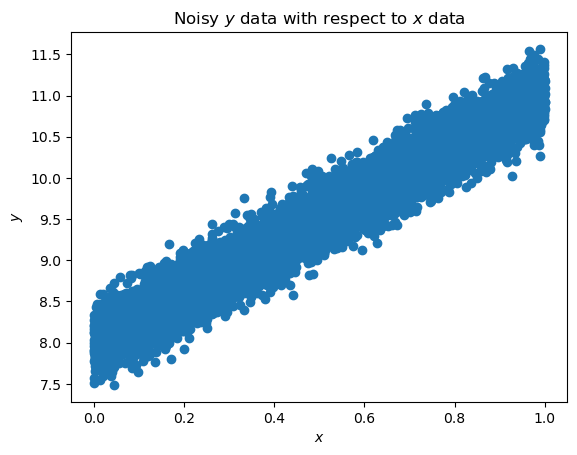

In [9]:
# Generating a set of x data with more values
x = np.arange(0, 1, 0.0001)

# Generating the corresponding y data
ytrue = model(x, a, b)

# Adding noise to y data
e = np.random.normal(loc=1, scale=0.2, size=len(x))
y = ytrue + e

# Displaying the result as a plot
fig, ax = plt.subplots()

ax.scatter(x, y)

plt.title("Noisy $y$ data with respect to $x$ data")
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.show()

#### Displaying histograms with `numpy.histogram()`

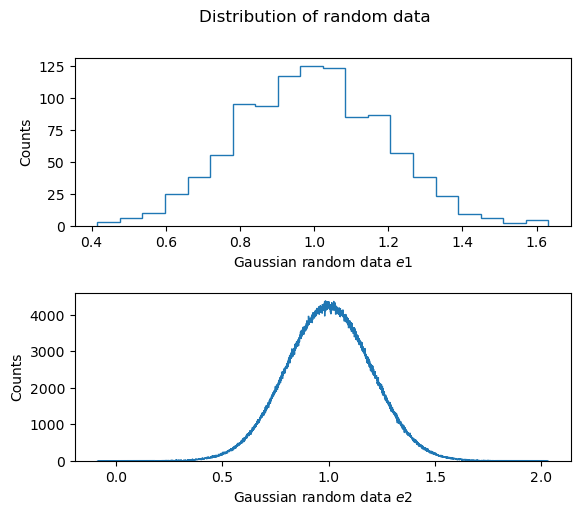

In [10]:
# Generating gaussian random values
e1 = np.random.normal(loc=1, scale=0.2, size=1000)
e2 = np.random.normal(loc=1, scale=0.2, size=5000000)

# Displaying the histograms
counts1, bins1 = np.histogram(e1, 20)
counts2, bins2 = np.histogram(e2, 5000)

fig, (ax1, ax2) = plt.subplots(2)

ax1.stairs(counts1, bins1)
ax2.stairs(counts2, bins2)

fig.suptitle("Distribution of random data")
ax1.set(xlabel="Gaussian random data $e1$", ylabel="Counts")
ax2.set(xlabel="Gaussian random data $e2$", ylabel="Counts")

# Changing the position of the second axes
pos = ax2.get_position()
ax2.set_position([pos.x0, pos.y0-0.07, pos.width, pos.height])

plt.show()

# Starting to fit

#### Declaring the variables that we will use from now on

In [11]:
# Numerical values arbitrarily chosen
x = np.arange(0, 1, 0.001)
ytrue = model(x, a, b)
n = len(x)
s = 0.2
e = np.random.normal(loc=0, size=n, scale=s)
y = ytrue + e

#### First fitting

In [12]:
# Computing the parameters that best fit the data
popt, pcov = opt.curve_fit(model, x, y)

# Displaying the computed fitting paramameters
print(f"Found parameters\n----------------\na: {popt[0]}\nb: {popt[1]}")

Found parameters
----------------
a: 2.981411438381103
b: 7.017745922622261


#### Distribution of the $\chi^2$ 's

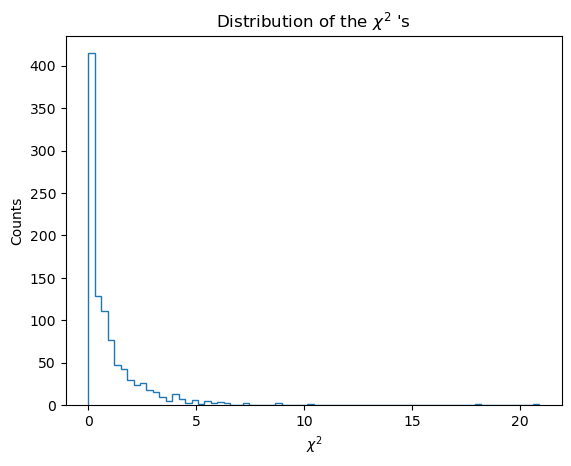

Mean of the chi-square's: 1.0221856799920415


In [13]:
# Fitting
popt, pcov = opt.curve_fit(model, x, y)

# Computing the chi-square's
ymod = model(x, popt[0], popt[1])
chi2s = (y-ymod)**2/s**2

# Displaying the result as a plot
counts, bins = np.histogram(chi2s, 70)

plt.stairs(counts,bins)

plt.title("Distribution of the $\chi^2$ 's")
plt.xlabel("$\chi^2$")
plt.ylabel("Counts")

plt.show()

# Displaying other result
print(f"Mean of the chi-square's: {np.mean(chi2s)}")

#### Distribution of the absolute deviation over local standard deviation for the parameters a ( $\frac{a_{model} - a}{\sigma_{a_{model}}}$ ) and b ( $\frac{b_{model} - b}{\sigma_{b_{model}}}$ )

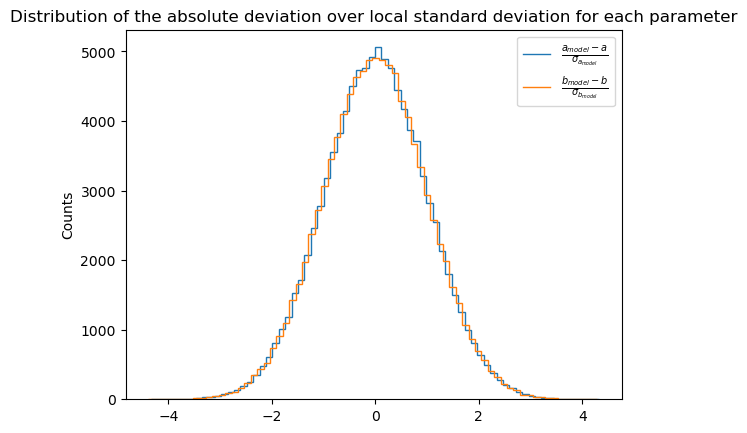

Related-to-a results
--------------------
Mean of the set of related-to-a terms: 0.002440587739194493
Standard deviation of the set of related-to-a terms: 1.003063295467629

Related-to-b results
--------------------
Mean of the set of related-to-b terms: -0.0037821099933672
Standard deviation of the set of related-to-b terms: 1.003236100564506


In [14]:
# Set of computed terms 
termsA = []
termsB = []

# Fitting 1000000 times for each newly generated data
for _ in range(0, 100000) :
    e = np.random.normal(loc=0, size=n, scale=s)
    y = ytrue + e
    
    (amod, bmod), pcov = opt.curve_fit(model, x, y)
    
    locsda = np.sqrt(pcov[0][0])
    locsdb = np.sqrt(pcov[1][1])
    
    termsA.append((amod - a)/locsda)
    termsB.append((bmod - b)/locsdb)

# Displaying the histogram
countsA, binsA = np.histogram(termsA, 70)
countsB, binsB = np.histogram(termsB, 70)

fig, ax = plt.subplots()

ax.stairs(countsA, binsA)
ax.stairs(countsB, binsB)

plt.title("Distribution of the absolute deviation over local standard deviation for each parameter")
plt.ylabel("Counts")
ax.legend([r"$\frac{a_{model} - a}{\sigma_{a_{model}}}$", r"$\frac{b_{model} - b}{\sigma_{b_{model}}}$"])

plt.show()

# Displaying other results
print("Related-to-a results\n--------------------")
print(f"Mean of the set of related-to-a terms: {np.mean(termsA)}")
print(f"Standard deviation of the set of related-to-a terms: {np.std(termsA)}")

print("\nRelated-to-b results\n--------------------")
print(f"Mean of the set of related-to-b terms: {np.mean(termsB)}")
print(f"Standard deviation of the set of related-to-b terms: {np.std(termsB)}")

#### Mean absolute deviation of the computed fitting parameters ( $a_{model}$ and $b_{model}$ ) with respect to the scale

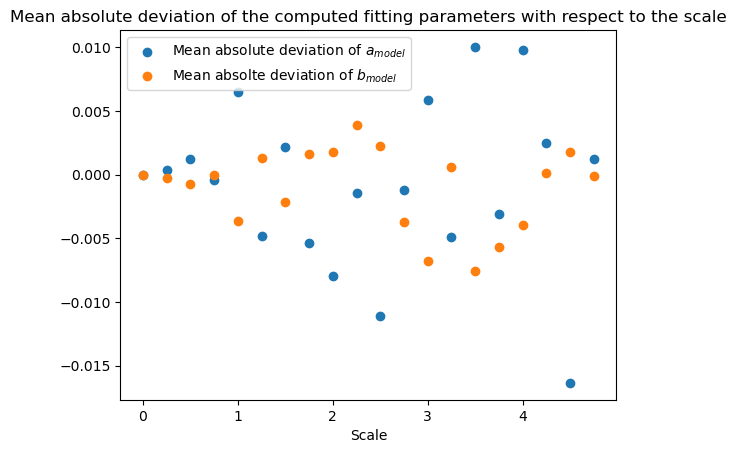

In [16]:
# Declaring useful variables
scales = np.arange(0, 5, 0.25)
ameans = []
bmeans = []

# Computing the mean computed fitting parameter for each scale value
for s in scales :
    adA = []
    adB = []
    # Fitting 1000 times to get the mean of the computed fitting parameters
    for _ in range(0,1000) :
        e = np.random.normal(loc=0, size=len(x), scale=s)
        y = ytrue + e
        
        (amod, bmod), pcov = opt.curve_fit(model, x, y)
        perr = np.sqrt(np.diag(pcov))
        
        adA.append(amod - a)
        adB.append(bmod - b)
        
    ameans.append(np.mean(adA))
    bmeans.append(np.mean(adB))

# Displaying the result as a plot
fig, ax = plt.subplots()

ax.scatter(scales,ameans)
ax.scatter(scales,bmeans)

plt.title("Mean absolute deviation of the computed fitting parameters with respect to the scale")
plt.xlabel("Scale")
ax.legend(["Mean absolute deviation of $a_{model}$", "Mean absolute deviation of $b_{model}$"])